In [391]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [392]:
data_crime=pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv")

In [393]:
data_crime.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [394]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


# EDA

In [395]:
year=data_crime["CrimeDate"].str.extract(r'(\d{4})').rename(columns={0:"year"})
day=data_crime["CrimeDate"].str.extract(r'.(\d{2})').rename(columns={0:"day"})
month=data_crime["CrimeDate"].str.extract(r'(\d{2})').rename(columns={0:"month"})

In [396]:
day.max()

day    31
dtype: object

In [397]:
month.max()

month    12
dtype: object

In [398]:
data_crime.dropna(inplace=True)
data_crime.drop(columns=["CrimeDate"],inplace=True)

In [399]:
date=pd.concat([year,month,day],axis=1)
data_crime=pd.concat([date,data_crime],axis=1)

# How to see most Crime in 2017 

In [400]:
most_crime_2017=data_crime[data_crime["year"]=="2017"]

In [401]:
most_crime_2017.groupby('year')["Description"].value_counts()

year  Description         
2017  COMMON ASSAULT          4642
      AGG. ASSAULT            3021
      ROBBERY - STREET        1306
      SHOOTING                 465
      ROBBERY - COMMERCIAL     373
      HOMICIDE                 232
      ROBBERY - CARJACKING     211
      RAPE                     151
      ROBBERY - RESIDENCE      137
Name: Description, dtype: int64

In [402]:
style_most_crime= pd.DataFrame(most_crime_2017['Description'].value_counts()).rename({"Description":"Total crime"}, axis = 1).rename_axis("Description").head(10).reset_index()

In [403]:
px.bar(style_most_crime,x="Description",y="Total crime",color="Description")

In [404]:
style_most_crime

,Description,Total crime
0,COMMON ASSAULT,4642
1,AGG. ASSAULT,3021
2,ROBBERY - STREET,1306
3,SHOOTING,465
4,ROBBERY - COMMERCIAL,373
5,HOMICIDE,232
6,ROBBERY - CARJACKING,211
7,RAPE,151
8,ROBBERY - RESIDENCE,137


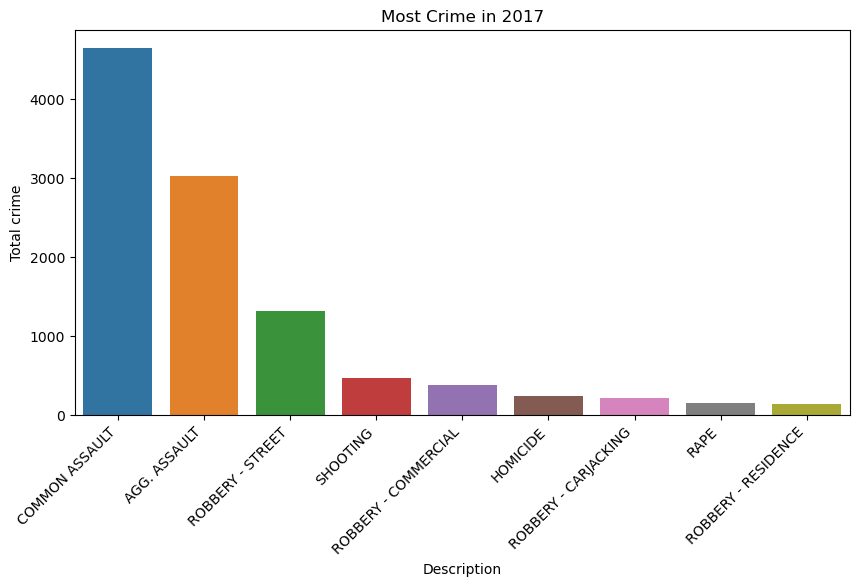

In [405]:
plt.figure(figsize=(10,5))
sns.barplot(data=style_most_crime,x="Description",y="Total crime")
plt.xticks(rotation=45, ha='right')
plt.title("Most Crime in 2017")
plt.show()

In [406]:
data_crime.head()

,year,month,day,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,2017,09,02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1.0
1,2017,09,02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,09,02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1.0
3,2017,09,02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1.0
4,2017,09,02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1.0


In [407]:
data_crime["year"].unique()

array(['2017', '2015', '2016', '2013', '2012', '2014'], dtype=object)

# How to see crime by month in 2017

In [409]:
style_crime_by_month_in_2017=pd.DataFrame(most_crime_2017[["month",'Description']].value_counts()).reset_index().rename(columns={0:"Total crime"})

In [410]:
style_crime_by_month_in_2017

,month,Description,Total crime
0,04,COMMON ASSAULT,690
1,05,COMMON ASSAULT,686
2,06,COMMON ASSAULT,681
3,03,COMMON ASSAULT,653
4,07,COMMON ASSAULT,558
...,...,...,...
75,09,SHOOTING,4
76,09,HOMICIDE,2
77,09,ROBBERY - COMMERCIAL,2
78,09,ROBBERY - CARJACKING,1


In [411]:
most_crime_2017.groupby(['month'])["Description"].value_counts()

month  Description         
01     COMMON ASSAULT          276
       AGG. ASSAULT            214
       ROBBERY - STREET        106
       SHOOTING                 68
       HOMICIDE                 32
                              ... 
09     SHOOTING                  4
       HOMICIDE                  2
       ROBBERY - COMMERCIAL      2
       ROBBERY - CARJACKING      1
       ROBBERY - RESIDENCE       1
Name: Description, Length: 80, dtype: int64

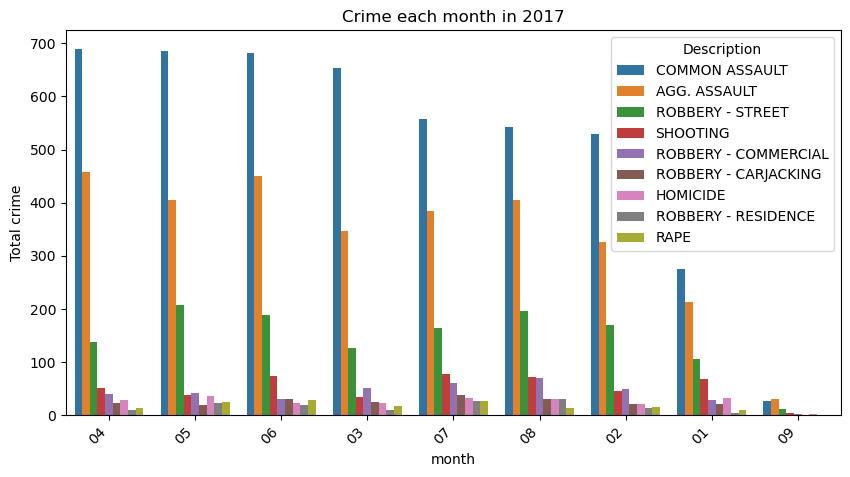

In [417]:
plt.figure(figsize=(10,5))
sns.barplot(data=style_crime_by_month_in_2017,x="month",y="Total crime",hue="Description")
plt.xticks(rotation=45, ha='right')
plt.title("Crime each month in 2017")
plt.show()